In [1]:
!pip install gdown
!pip install tensorflow_text

Processing /home/asmany/.cache/pip/wheels/8d/df/71/846b2aa0fabaac2af23fbc5214eeaa55f0616e9d1a05187d72/gdown-4.5.1-py3-none-any.whl
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
     |████████████████████████████████| 78 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.4 MB/s eta 0:00:01
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
     |████████████████████████████████| 139 kB 819 kB/s eta 0:00:01
  Using cached idna-3.3-py3-none-any.whl (61 kB)
     |████████████████████████████████| 160 kB 2.4 MB/s eta 0:00:01
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached tensorflow_text-2.9.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached tensorflow-2.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
     |████████████████████████████████| 408 kB

In [2]:
!pip install wordcloud

     |████████████████████████████████| 458 kB 1.1 MB/s eta 0:00:01
  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
     |████████████████████████████████| 3.1 MB 217 kB/s eta 0:00:01
     |████████████████████████████████| 944 kB 425 kB/s eta 0:00:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 1.2 MB 342 kB/s eta 0:00:01


In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 511.7 MB 72 kB/s  eta 0:00:01    |██                              | 30.9 MB 890 kB/s eta 0:09:01     |██████████████████████████▋     | 425.3 MB 469 kB/s eta 0:03:05     |██████████████████████████████▍ | 486.4 MB 1.1 MB/s eta 0:00:24
  Using cached protobuf-3.19.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.4
    Uninstalling protobuf-4.21.4:
      Successfully uninstalled protobuf-4.21.4


In [5]:
!pip install seaborn

     |████████████████████████████████| 292 kB 683 kB/s eta 0:00:01
     |████████████████████████████████| 43.4 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 432 kB/s eta 0:00:01
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
# import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text

%matplotlib inline
%config InlineBackend.figure_format='retina'

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
!gdown --id 1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r --output 515k-hotel-reviews-data-in-europe.zip

/home/asmany/Documents/Sentiment-Analysis-using-Deep-Learning/venv-sentiment-analysis/lib/python3.8/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r
To: /home/asmany/Documents/Sentiment-Analysis-using-Deep-Learning/515k-hotel-reviews-data-in-europe.zip
100%|███████████████████████████████████████| 47.3M/47.3M [01:03<00:00, 746kB/s]


In [4]:
!unzip -q 515k-hotel-reviews-data-in-europe.zip

In [5]:
!ls

515k-hotel-reviews-data-in-europe.zip  sentiment_analysis.ipynb
Hotel_Reviews.csv		       venv-sentiment-analysis
README.md


In [6]:
df = pd.read_csv("Hotel_Reviews.csv", parse_dates=['Review_Date'])
df.shape

(515738, 17)

# Exploration

In [7]:
df.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-09,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-08,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [8]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]
df["review_type"] = df["Reviewer_Score"].apply(
  lambda x: "bad" if x < 7 else "good"
)

In [9]:
df = df[["review", "review_type"]]

In [10]:
df.review_type.value_counts()

good    428887
bad      86851
Name: review_type, dtype: int64

In [11]:
good_reviews = df[df.review_type == "good"]
bad_reviews = df[df.review_type == "bad"]

In [12]:
print(good_reviews.shape, bad_reviews.shape)

(428887, 2) (86851, 2)


In [13]:
good_df = good_reviews.sample(n=len(bad_reviews), random_state=RANDOM_SEED)
bad_df = bad_reviews

In [14]:
review_df = good_df.append(bad_df).reset_index(drop=True)
review_df.shape

(173702, 2)

In [15]:
review_df.head()

,review,review_type
0,Nothing not to like Location was excellent r...,good
1,Replenishment of supplies in room toiletries ...,good
2,No Negative The views,good
3,Could do with biscuits and a complimentary wa...,good
4,Bar prices expensive and mini bar very expens...,good


#  Load Universal Sentence Encoder

In [16]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

# Preprocessing

In [17]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.review_type.to_numpy().reshape(-1, 1)
)

In [18]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.review, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )

In [19]:
X_train = []
for r in tqdm(train_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

100%|██████████| 156331/156331 [11:59:31<00:00,  3.62it/s]       


In [20]:
X_test = []
for r in tqdm(test_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 17371/17371 [16:32<00:00, 17.51it/s]


In [21]:
print(X_train.shape, X_test.shape)

(156331, 512) (17371, 512)


In [22]:
print(X_train.shape, y_train.shape)

(156331, 512) (156331, 2)


# Sentiment Analysis

In [23]:
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=True
)

Epoch 1/10
8794/8794 [==============================] - 31s 3ms/step - loss: 0.4340 - accuracy: 0.7977 - val_loss: 0.4016 - val_accuracy: 0.8114
Epoch 2/10
8794/8794 [==============================] - 29s 3ms/step - loss: 0.4124 - accuracy: 0.8104 - val_loss: 0.3937 - val_accuracy: 0.8183
Epoch 3/10
8794/8794 [==============================] - 29s 3ms/step - loss: 0.4038 - accuracy: 0.8156 - val_loss: 0.3911 - val_accuracy: 0.8187
Epoch 4/10
8794/8794 [==============================] - 29s 3ms/step - loss: 0.3971 - accuracy: 0.8199 - val_loss: 0.3871 - val_accuracy: 0.8223
Epoch 5/10
8794/8794 [==============================] - 29s 3ms/step - loss: 0.3916 - accuracy: 0.8232 - val_loss: 0.3889 - val_accuracy: 0.8219
Epoch 6/10
8794/8794 [==============================] - 29s 3ms/step - loss: 0.3861 - accuracy: 0.8258 - val_loss: 0.3855 - val_accuracy: 0.8217
Epoch 7/10
8794/8794 [==============================] - 29s 3ms/step - loss: 0.3815 - accuracy: 0.8282 - val_loss: 0.3851 - val_ac

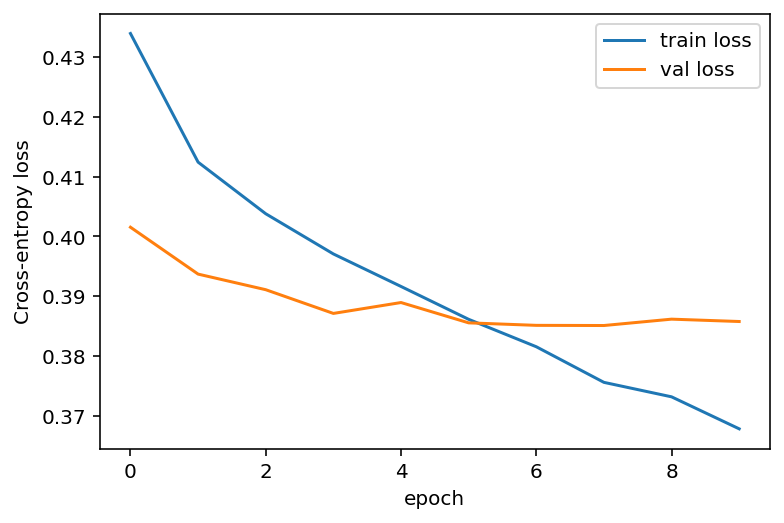

In [25]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

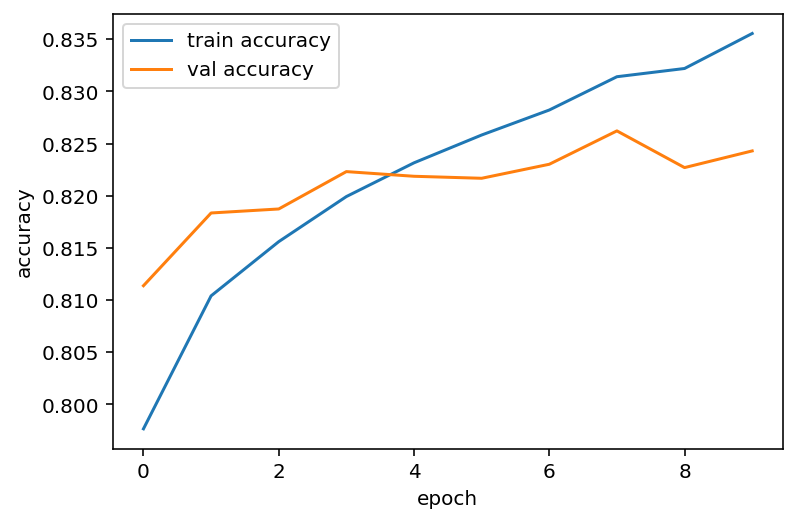

In [26]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [27]:
model.evaluate(X_test, y_test)

543/543 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8183


[0.3960392475128174, 0.8182603120803833]

# Predictions

In [28]:
print(test_reviews.iloc[0])
print("Bad" if y_test[0][0] == 1 else "Good")

 Asked for late checkout and didnt get an answer then got a yes but had to pay 25 euros by noon they called to say sorry you have to leave in 1h knowing that i had a sick dog and an appointment next to the hotel  Location staff 
Bad


In [29]:
y_pred = model.predict(X_test[:1])
print(y_pred)
"Bad" if np.argmax(y_pred) == 0 else "Good"

1/1 [==============================] - 0s 77ms/step
[[0.92286676 0.07713319]]


'Bad'

In [30]:
print(test_reviews.iloc[1])
print("Bad" if y_test[1][0] == 1 else "Good")

 Don t really like modern hotels Had no character Bed was too hard  Good location rooftop pool new hotel nice balcony nice breakfast 
Good


In [31]:
y_pred = model.predict(X_test[1:2])
print(y_pred)
"Bad" if np.argmax(y_pred) == 0 else "Good"

1/1 [==============================] - 0s 21ms/step
[[0.38084203 0.6191579 ]]


'Good'

In [32]:
print(test_reviews.iloc[5])
print("Bad" if y_test[5][0] == 1 else "Good")

 Flooded bathroom from room above Painting and decorating blocking stair access  Easy to find Easy location No traffic noise in room 
Bad


In [33]:
y_pred = model.predict(X_test[5:6])
print(y_pred)
"Bad" if np.argmax(y_pred) == 0 else "Good"

1/1 [==============================] - 0s 20ms/step
[[0.5448713 0.4551287]]


'Bad'